# Classification based on given features (SVM)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import os
import cv2
from matplotlib.image import imread

In [ ]:
features = pd.read_csv('/content/gdrive/MyDrive/Features/features.csv',header=None)
features

0         1         2         3         4         5         6     \
0     0.522970  0.299877  1.854656 -0.127650  0.813650 -0.148206  0.086093   
1     0.013961  0.122444 -0.132735 -0.118628  0.173108 -0.136272 -0.084335   
2     0.538563  0.509407  1.775910 -0.127933  1.709609 -0.140871  0.127283   
3    -0.074457 -0.116068 -0.196760 -0.011271 -0.168376  1.241772 -0.116697   
4    -0.051129 -0.174848 -0.028430  1.820420 -0.089466  2.193471  0.114552   
...        ...       ...       ...       ...       ...       ...       ...   
3413  0.188845  0.181740  0.000457 -0.133928  0.575991 -0.167212  0.093093   
3414  0.069198 -0.091497  0.124390 -0.169842  0.235213 -0.221722 -0.084336   
3415  0.220922 -0.025789  0.154959 -0.162007  0.248210 -0.193766 -0.148826   
3416 -0.099168 -0.126265 -0.089775  0.245519 -0.126568  1.240803 -0.120931   
3417 -0.149552 -0.112233 -0.112708 -0.114982 -0.031138  0.050955 -0.160307   

          7         8         9     ...      1270      1271      1272  \
0    -0.099617 -0.060342  2.059088  ... -0.105705 -0.139349 -0.058845   
1    -0.131051  0.161909  0.824182  ... -0.113773 -0.165884 -0.113729   
2    -0.092119 -0.083881  1.833654  ... -0.083452 -0.139409 -0.090185   
3    -0.029380 -0.040485 -0.107858  ...  0.860665 -0.084137  0.326265   
4    -0.029080  3.765160 -0.053691  ...  5.197541  1.984923  1.948692   
...        ...       ...       ...  ...       ...       ...       ...   
3413 -0.111037 -0.112299  0.514472  ... -0.075440 -0.164179 -0.101755   
3414 -0.168707 -0.071297  0.257700  ... -0.099730 -0.154313 -0.100462   
3415 -0.153745 -0.106148  1.394486  ... -0.100166 -0.174926 -0.096002   
3416 -0.040557  1.584138 -0.139105  ...  1.359986  0.430271  0.511444   
3417 -0.089095  0.048182 -0.122266  ... -0.155368 -0.040546 -0.041083   

          1273      1274      1275      1276      1277      1278      1279  
0     2.431875  0.062066 -0.245895  0.086882 -0.126205  0.218028  0.169009  
1     0.221492 -0.142989 -0.146476  0.226548 -0.138845  0.201534  0.249506  
2     1.966274 -0.121026 -0.134771  0.824233 -0.107500  0.530300  0.368836  
3    -0.254838 -0.131203  0.494691 -0.008144 -0.004061 -0.208142 -0.168128  
4    -0.195730 -0.029222  3.375637  0.439649  0.881086 -0.012821 -0.026665  
...        ...       ...       ...       ...       ...       ...       ...  
3413  0.973446  0.586366 -0.112277 -0.200143 -0.107301  0.880406  0.564792  
3414  0.484658  0.865008 -0.115266 -0.130826 -0.148095  0.845961  0.496394  
3415  0.072601 -0.136642 -0.139678  0.284274 -0.143948  0.323482  0.430027  
3416 -0.260776 -0.101833  1.298561  0.006774  0.390692 -0.125927 -0.158199  
3417 -0.170057  0.387308  0.158079 -0.144396 -0.089689 -0.186095 -0.172796  

[3418 rows x 1280 columns]

In [ ]:
labels = pd.read_csv('/content/gdrive/MyDrive/Features/labels.csv',header=None)
labels

0
0       810101213_fake_stable_mountain_2.png
1        810701006_fake_stable_jungle_2.jpeg
2      810199494_fake_stable_mountain_4.jpeg
3          810199567_real_none_jungle_6.jpeg
4           810101149_real_none_jungle_1.jpg
...                                      ...
3413  810101201_fake_dallemini_jungle_5.jpeg
3414    810198375_fake_stable_mountain_4.jpg
3415   810199427_fake_stable_mountain_5.jpeg
3416       810197636_real_none_jungle_7.jpeg
3417          150400011_real_none_sea_10.jpg

[3418 rows x 1 columns]

In [ ]:
y = np.array([])
for i in range(len(labels)):
    if ('fake' in str(labels.iloc[i]).split('_')) or ('Fake' in str(labels.iloc[i]).split('_')):
        y = np.append(y,1)
    elif ('fake' in str(labels.iloc[i]).split('-')) or ('Fake' in str(labels.iloc[i]).split('-')):
        y = np.append(y,1)
    elif ('real' in str(labels.iloc[i]).split('_')) or ('Real' in str(labels.iloc[i]).split('_')):
        y = np.append(y,0)
    elif ('real' in str(labels.iloc[i]).split('-')) or ('Real' in str(labels.iloc[i]).split('-')):
        y = np.append(y,0)
    else :
        y = np.append(y,-1)
        print(i)

In [ ]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0., 1.]), array([1708, 1710]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.3)

np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((2392, 1280), (2392,), (1026, 1280), (1026,))

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1187
         1.0       1.00      0.99      1.00      1205

    accuracy                           1.00      2392
   macro avg       1.00      1.00      1.00      2392
weighted avg       1.00      1.00      1.00      2392



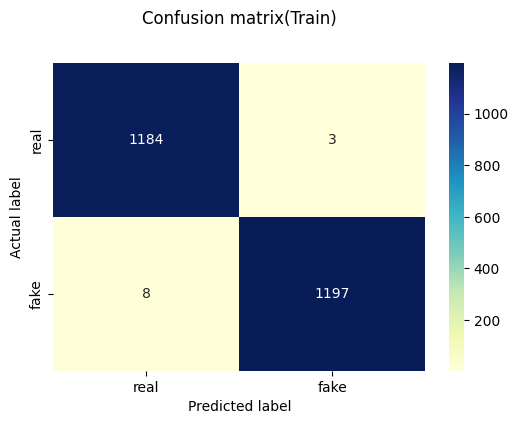

In [ ]:
fig,ax= plt.subplots(figsize=(6, 4))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix(Train)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
class_names = ['real','fake']
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);

In [ ]:
miss_classified = labels.iloc[(np.nonzero(y_train - y_pred_train))]
miss_classified

0
95    810101251_fake_stable_mountain_2.jpeg
554         810100457_fake_stable_sea_2.jpg
1176   810101114_fake_dalle_mountain_2.jpeg
1320      810101114_real_none_jungle_3.jpeg
1461    610398217_real_none_mountain_6.jpeg
1531    810101243_fake_stable_jungle_2.jpeg
1598    810197238_fake_stable_jungle_3.jpeg
1608      810701006_real_none_jungle_5.jpeg
1654    810199570_fake_stable_jungle_2.jpeg
2027      810198358_real_none_jungle_1.jpeg
2180  810698270_fake_dreamstudio_sea_2.jpeg

In [ ]:
fake_images = os.listdir('/content/gdrive/MyDrive/fake')
real_images = os.listdir('/content/gdrive/MyDrive/real')

miss_classified_images = []
actual_labels = []
pred_labels = []
for i in range(len(miss_classified)):
    if ('fake' in miss_classified.iloc[i].to_string(index=False).split('_')) or ('Fake' in miss_classified.iloc[i].to_string(index=False).split('_')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/fake/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('fake')
        pred_labels.append('real')

    elif ('fake' in miss_classified.iloc[i].to_string(index=False).split('-')) or ('Fake' in miss_classified.iloc[i].to_string(index=False).split('-')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/fake/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('fake')
        pred_labels.append('real')

    elif ('real' in miss_classified.iloc[i].to_string(index=False).split('_')) or ('Real' in miss_classified.iloc[i].to_string(index=False).split('_')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/real/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('real')
        pred_labels.append('fake')

    elif ('real' in miss_classified.iloc[i].to_string(index=False).split('-')) or ('Real' in miss_classified.iloc[i].to_string(index=False).split('-')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/real/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('real')
        pred_labels.append('fake')

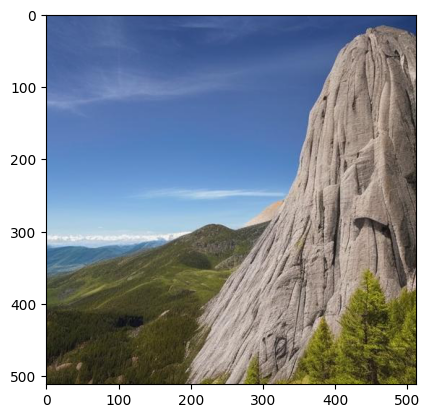

Actual Label:  fake , Predicted Label:  real





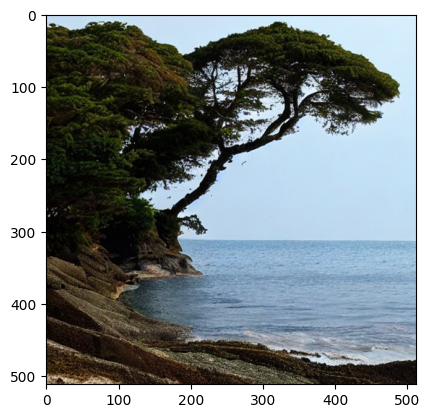

Actual Label:  fake , Predicted Label:  real





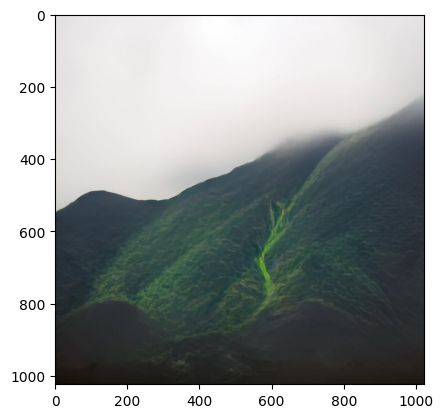

Actual Label:  fake , Predicted Label:  real





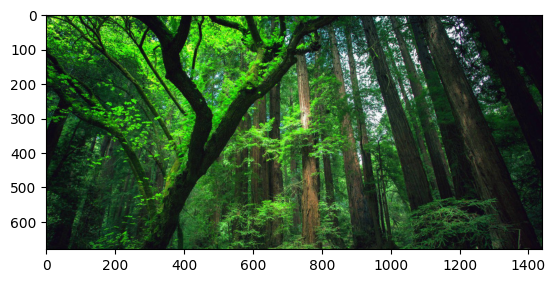

Actual Label:  real , Predicted Label:  fake





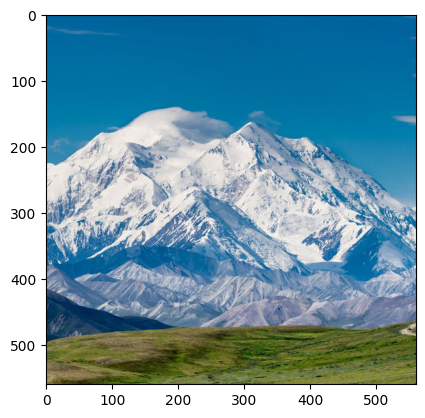

Actual Label:  real , Predicted Label:  fake





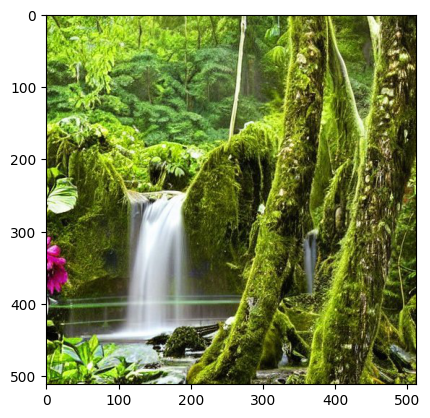

Actual Label:  fake , Predicted Label:  real





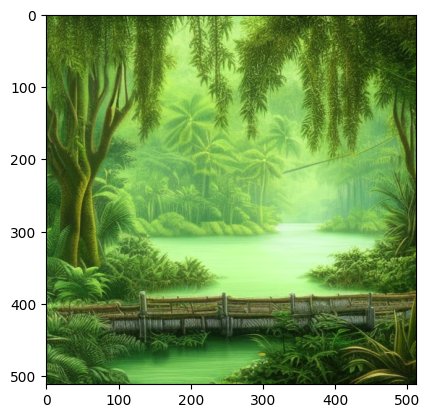

Actual Label:  fake , Predicted Label:  real





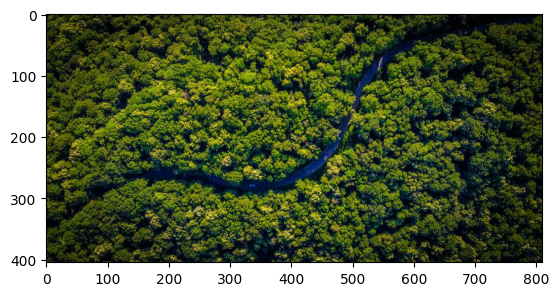

Actual Label:  real , Predicted Label:  fake





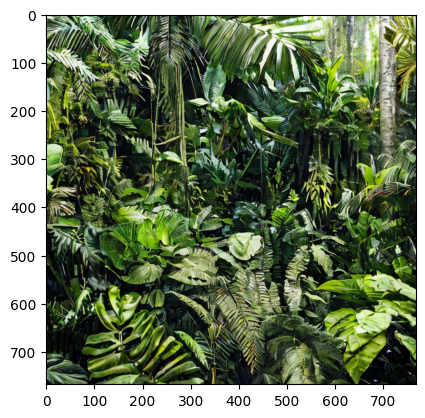

Actual Label:  fake , Predicted Label:  real





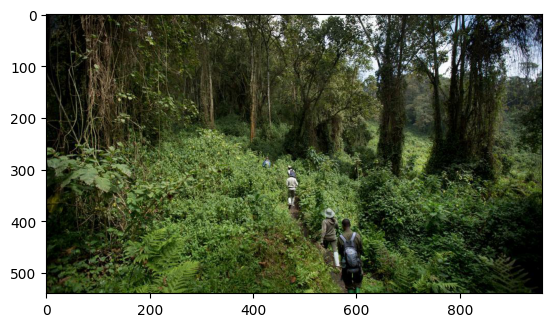

Actual Label:  real , Predicted Label:  fake





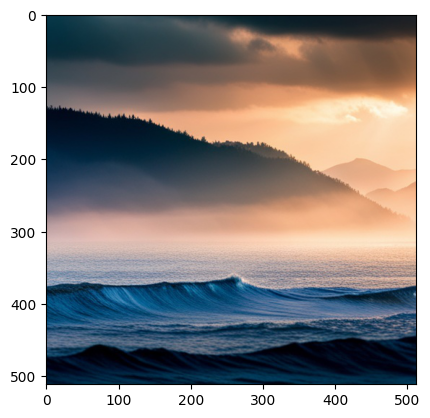

Actual Label:  fake , Predicted Label:  real


In [ ]:
for i in range(len(miss_classified_images)):
    print('\n\n')
    plt.imshow(miss_classified_images[i])
    plt.show()
    print('Actual Label: ',actual_labels[i],', Predicted Label: ', pred_labels[i])


In [ ]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       521
         1.0       1.00      1.00      1.00       505

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026



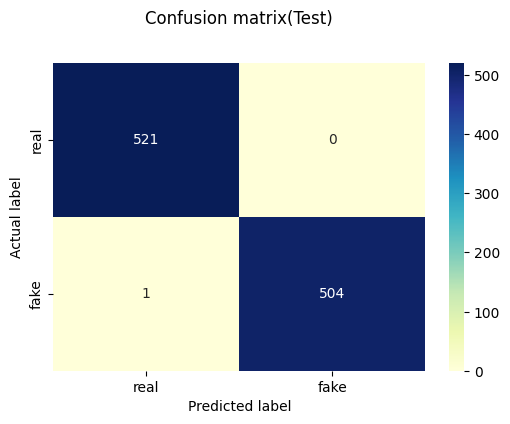

In [ ]:
fig,ax= plt.subplots(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix(Test)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
class_names = ['real','fake']
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);

In [ ]:
miss_classified = labels.iloc[(np.nonzero(y_test - y_pred_test))]
miss_classified

0
450  810198358_real_none_sea_1.jpeg

In [ ]:
fake_images = os.listdir('/content/gdrive/MyDrive/fake')
real_images = os.listdir('/content/gdrive/MyDrive/real')

miss_classified_images = []
actual_labels = []
pred_labels = []
for i in range(len(miss_classified)):
    if ('fake' in miss_classified.iloc[i].to_string(index=False).split('_')) or ('Fake' in miss_classified.iloc[i].to_string(index=False).split('_')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/fake/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('fake')
        pred_labels.append('real')

    elif ('fake' in miss_classified.iloc[i].to_string(index=False).split('-')) or ('Fake' in miss_classified.iloc[i].to_string(index=False).split('-')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/fake/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('fake')
        pred_labels.append('real')

    elif ('real' in miss_classified.iloc[i].to_string(index=False).split('_')) or ('Real' in miss_classified.iloc[i].to_string(index=False).split('_')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/real/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('real')
        pred_labels.append('fake')

    elif ('real' in miss_classified.iloc[i].to_string(index=False).split('-')) or ('Real' in miss_classified.iloc[i].to_string(index=False).split('-')):
        miss_classified_images.append(imread("/content/gdrive/MyDrive/real/" + miss_classified.iloc[i].to_string(index=False)))
        actual_labels.append('real')
        pred_labels.append('fake')

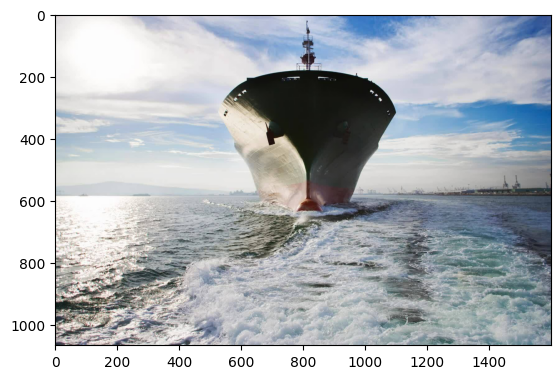

Actual Label:  real , Predicted Label:  fake


In [ ]:
for i in range(len(miss_classified_images)):
    print('\n\n')
    plt.imshow(miss_classified_images[i])
    plt.show()
    print('Actual Label: ',actual_labels[i],', Predicted Label: ', pred_labels[i])


# Classification based on given features (Neural Networks)

In [ ]:
import io
from google.colab import files
import matplotlib.pyplot as plt
import tensorflow.keras as tns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pds
import numpy as np
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from matplotlib.image import imread

lRate = 0.001
test_ratio = 0.3
batchsize = 40
num_of_classes = 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_IO = files.upload()

Saving labels.csv to labels (1).csv


In [ ]:
features_IO = files.upload()

Saving features.csv to features.csv


In [ ]:
x = pds.read_csv(io.BytesIO(features_IO['features.csv']), header = None)
y_char = pds.read_csv(io.BytesIO(labels_IO['labels.csv']), header = None)

In [ ]:
def encode_y(y_stringed):
  encoded = np.array([])
  for i in range(len(y_stringed)):
    if ('fake' in str(y_stringed.iloc[i,0]).split('_')) or ('Fake' in str(y_stringed.iloc[i,0]).split('_')):
        encoded = np.append(encoded,1)
    elif ('fake' in str(y_stringed.iloc[i,0]).split('-')) or ('Fake' in str(y_stringed.iloc[i,0]).split('-')):
        encoded = np.append(encoded,1)
    elif ('real' in str(y_stringed.iloc[i,0]).split('_')) or ('Real' in str(y_stringed.iloc[i,0]).split('_')):
        encoded = np.append(encoded,0)
    elif ('real' in str(y_stringed.iloc[i,0]).split('-')) or ('Real' in str(y_stringed.iloc[i,0]).split('-')):
        encoded = np.append(encoded,0)
  return encoded

In [ ]:
def feedForward(firstLayerNuerons, secondLayerNuerons, function):
    inputLayer = tns.layers.Input(x_train.iloc[0].shape)
    outputLayer = tns.layers.Flatten()(inputLayer)

    outputLayer = tns.layers.Dense(firstLayerNuerons, activation = function, kernel_regularizer = None)(inputLayer)
    outputLayer = tns.layers.Dense(secondLayerNuerons, activation = function, kernel_regularizer = None)(outputLayer)

    outputLayer = tns.layers.Dense(1, activation = 'sigmoid', kernel_regularizer = None)(outputLayer)
    NN = tns.Model(inputLayer, outputLayer)
    return NN


In [ ]:
def analyze_model(model, X_train, X_test, Y_train, Y_test, Optimizer, loss_function, num_of_epochs):
    model.compile(optimizer = Optimizer, loss = loss_function, metrics = ['accuracy'])
    model.summary()
    results = model.fit(X_train, Y_train, batch_size = batchsize, validation_data = (X_test, Y_test), epochs = num_of_epochs)


In [ ]:
def plot_confusion_matrix(model, labels, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_pred_modified = []
    for i in range(len(y_pred)):
        y_pred_modified.append(int(round(y_pred[i,0], 1)))
    matrix = confusion_matrix(Y_test, y_pred_modified)
    sns.heatmap(matrix, cmap=plt.cm.Blues, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.show()
    print(classification_report(Y_test, y_pred_modified))

In [ ]:
def give_misclassifications(model, x, y):
  lab = ['Real', 'Fake']
  y_pred = model.predict(x)
  mislabel = []
  for j in range(len(y_pred)):
    cur_pred = int(round(y_pred[j,0], 1))
    if cur_pred != int(y[j]):
      mislabel.append([j , lab[cur_pred], lab[int(y[j])]])
  return mislabel

In [ ]:
y = encode_y(y_char)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = test_ratio, random_state = 0)

In [ ]:
NN = feedForward(firstLayerNuerons = 100, secondLayerNuerons = 64, function = 'relu')

In [ ]:
analyze_model(model = NN, X_train = x_train, X_test = x_test, Y_train = y_train, Y_test = y_test, Optimizer = tns.optimizers.Adam(learning_rate = lRate), loss_function = 'binary_crossentropy', num_of_epochs = 40)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1280)]            0         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 134,629
Trainable params: 134,629
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
60/60 [==============================] - 2s 9ms/step - loss: 0.0386 - accuracy: 0.9858 - val_loss: 0.0096 - val_accuracy: 0.9971
Epoch 2/40
60/60 [=============================

Output of model on train dataset:
75/75 [==============================] - 0s 2ms/step


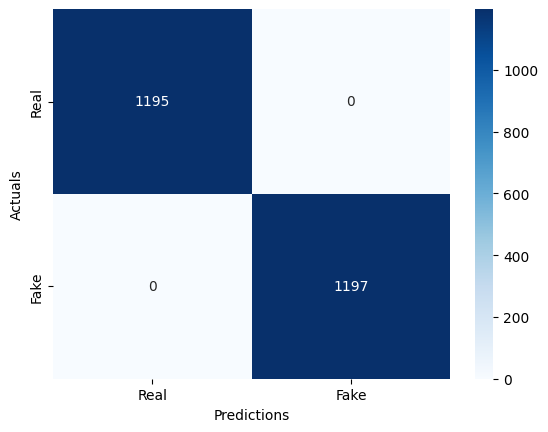

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1195
         1.0       1.00      1.00      1.00      1197

    accuracy                           1.00      2392
   macro avg       1.00      1.00      1.00      2392
weighted avg       1.00      1.00      1.00      2392



In [ ]:
print('Output of model on train dataset:')
plot_confusion_matrix(NN, ['Real', 'Fake'], x_train, y_train)

Output of model on test dataset:
33/33 [==============================] - 0s 2ms/step


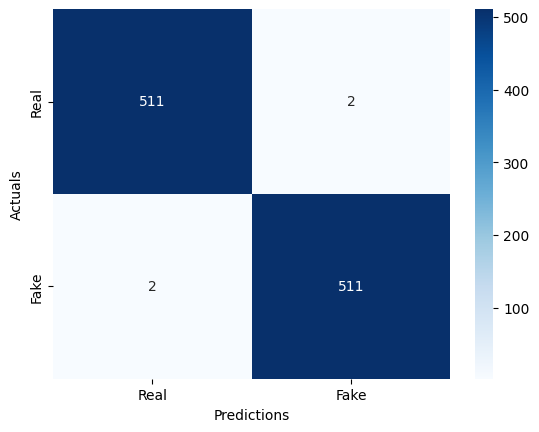

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       513
         1.0       1.00      1.00      1.00       513

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026



In [ ]:
print('Output of model on test dataset:')
plot_confusion_matrix(NN, ['Real', 'Fake'], x_test, y_test)

In [ ]:
misclassification = give_misclassifications(NN, x, y)

107/107 [==============================] - 0s 2ms/step


In [ ]:
def show_misclassified(misclassified):
  fake_images_dir = os.listdir('/content/drive/MyDrive/fake (1)')
  real_images_dir = os.listdir('/content/drive/MyDrive/real (1)')
  images = []
  for i in range(len(misclassified)):
    # print(misclassified[i])
    file_name = misclassified[i]
    if ('fake' in file_name.split('_')) or ('Fake' in file_name.split('_')):
      images.append(imread("/content/drive/MyDrive/fake (1)/" + file_name))
    elif ('fake' in file_name.split('-')) or ('Fake' in file_name.split('-')):
      images.append(imread("/content/drive/MyDrive/fake (1)/" + file_name))
    elif ('real' in file_name.split('_')) or ('Real' in file_name.split('_')):
      images.append(imread("/content/drive/MyDrive/real (1)/" + file_name))
    elif ('real' in file_name.split('-')) or ('Real' in file_name.split('-')):
      images.append(imread("/content/drive/MyDrive/real (1)/" + file_name))

  return images

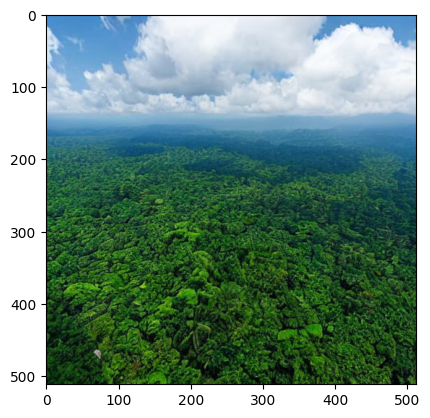

Misclassified image:	 810100503_fake_stable_jungle_5.jpeg
Prediction:		 Real
Reality:		 Fake
%%%%%%%%%%%%%%%%%




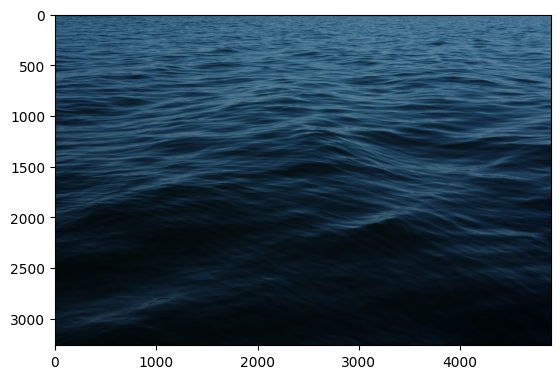

Misclassified image:	 810199456_real_none_sea_4.jpg
Prediction:		 Fake
Reality:		 Real
%%%%%%%%%%%%%%%%%




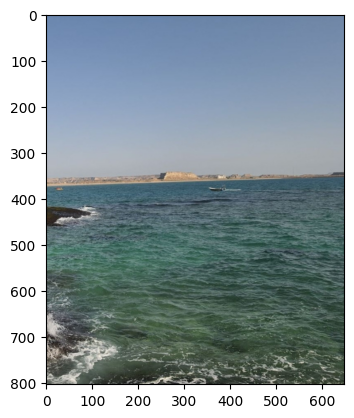

Misclassified image:	 810199436_real_none_sea_9.jpeg
Prediction:		 Fake
Reality:		 Real
%%%%%%%%%%%%%%%%%




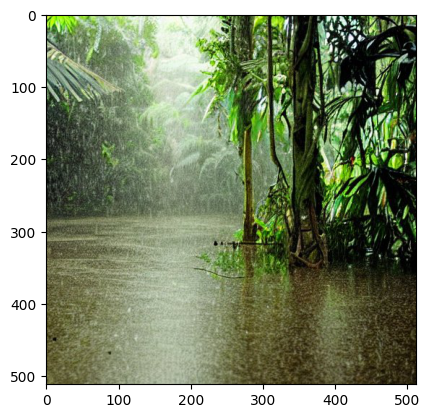

Misclassified image:	 810197636_fake_stable_jungle_4.jpeg
Prediction:		 Real
Reality:		 Fake
%%%%%%%%%%%%%%%%%




In [ ]:
misclassified_file_names = []
for j in range(len(misclassification)):
  misclassified_file_names.append(y_char.iloc[misclassification[j][0], 0])
images = show_misclassified(misclassified_file_names)

for i in range(len(images)):
      plt.imshow(images[i])
      plt.show()
      print('Misclassified image:\t', misclassified_file_names[i])
      print('Prediction:\t\t', misclassification[i][1])
      print('Reality:\t\t', misclassification[i][2])
      print('%%%%%%%%%%%%%%%%%\n\n')